# Mudança para formato longo e algumas correcções básicas

## Inicialização

In [1]:
import numpy as np
import pandas as pd

C:\Users\guilh\AppData\Local\Temp\ipykernel_23488\1662815981.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Diretoria onde os dados estão localizados
dir_original_files = './02-dados-qualar-integrados/'

# Directoria onde vamos guardar os resultados 
dir_destination = './03-dados-qualar-longo-corrigido/'

In [3]:
# ficheiro das medições 
ficheiro_medicoes = dir_original_files + '02-medicoes-um-ficheiro.csv'

In [4]:
df = pd.read_csv(ficheiro_medicoes, thousands=',', index_col=0)

In [5]:
df

,Dióxido de Enxofre (µg/m3),Partículas < 10 µm (µg/m3),Ozono (µg/m3),Dióxido de Azoto (µg/m3),Monóxido de Carbono (mg/m3),Benzeno (µg/m3),Partículas < 2.5 µm (µg/m3),estacao
2001-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afonso III
2001-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afonso III
2001-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afonso III
2001-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afonso III
2001-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afonso III
...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,4.0,27.0,59.0,2.0,NaN,NaN,NaN,Ílhavo
2022-12-31 20:00:00,2.2,26.0,57.0,2.0,NaN,NaN,NaN,Ílhavo
2022-12-31 21:00:00,0.8,28.0,55.0,2.0,NaN,NaN,NaN,Ílhavo
2022-12-31 22:00:00,0.5,30.0,55.0,2.0,NaN,NaN,NaN,Ílhavo


## Mudança de nomes de colunas
Vamos usar nomes mais simples:

    - Dióxido de Enxofre (µg/m3): SO2
    - Partículas < 10 µm (µg/m3): PM10
    - Ozono (µg/m3): O3
    - Dióxido de Azoto (µg/m3): NO2
    - Monóxido de Carbono (mg/m3): CO
    - Benzeno (µg/m3): Benzeno
    - Partículas < 2.5 µm (µg/m3): PM2.5

In [6]:
# Renomear as colunas atuais (esquerda), para os nomes mais simples (simples).
df.rename(columns={'Dióxido de Enxofre (µg/m3)': 'SO2', 'Partículas < 10 µm (µg/m3)': 'PM10' , 'Ozono (µg/m3)': 'O3', 'Dióxido de Azoto (µg/m3)': 'NO2' , 'Monóxido de Carbono (mg/m3)': 'CO', 'Benzeno (µg/m3)': 'Benzeno', 'Partículas < 2.5 µm (µg/m3)': 'PM2.5' }, inplace=True)
# Conferir o resultado
df

,SO2,PM10,O3,NO2,CO,Benzeno,PM2.5,estacao
2001-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afonso III
2001-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afonso III
2001-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afonso III
2001-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afonso III
2001-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afonso III
...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,4.0,27.0,59.0,2.0,NaN,NaN,NaN,Ílhavo
2022-12-31 20:00:00,2.2,26.0,57.0,2.0,NaN,NaN,NaN,Ílhavo
2022-12-31 21:00:00,0.8,28.0,55.0,2.0,NaN,NaN,NaN,Ílhavo
2022-12-31 22:00:00,0.5,30.0,55.0,2.0,NaN,NaN,NaN,Ílhavo


In [7]:
# Como não iremos usar as medições de Benzendo e CO, podemos removê-las
df.drop(['Benzeno', 'CO'], axis=1, inplace=True)
# Conferir o resultado
df

,SO2,PM10,O3,NO2,PM2.5,estacao
2001-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,Afonso III
2001-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,Afonso III
2001-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,Afonso III
2001-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,Afonso III
2001-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,Afonso III
...,...,...,...,...,...,...
2022-12-31 19:00:00,4.0,27.0,59.0,2.0,NaN,Ílhavo
2022-12-31 20:00:00,2.2,26.0,57.0,2.0,NaN,Ílhavo
2022-12-31 21:00:00,0.8,28.0,55.0,2.0,NaN,Ílhavo
2022-12-31 22:00:00,0.5,30.0,55.0,2.0,NaN,Ílhavo


## Converter para formato longo

In [8]:
# Cada linha será definida pela data (no index), pela estação e pelo poluente
df_melted=pd.melt(df.reset_index(), id_vars=['index','estacao'], value_vars=['SO2', 'PM10', 'O3', 'NO2', 'PM2.5'])
df_melted.rename(columns={'variable': 'poluente', 'value': 'valor'}, inplace=True)
df_melted.set_index('index', inplace=True)
# Conferir o resultado
df_melted

,estacao,poluente,valor
index,,,
2001-01-01 00:00:00,Afonso III,SO2,NaN
2001-01-01 01:00:00,Afonso III,SO2,NaN
2001-01-01 02:00:00,Afonso III,SO2,NaN
2001-01-01 03:00:00,Afonso III,SO2,NaN
2001-01-01 04:00:00,Afonso III,SO2,NaN
...,...,...,...
2022-12-31 19:00:00,Ílhavo,PM2.5,NaN
2022-12-31 20:00:00,Ílhavo,PM2.5,NaN
2022-12-31 21:00:00,Ílhavo,PM2.5,NaN


In [9]:
# Agora podemos remover os nulos 
df_nulos=df_melted.dropna()
# Conferir o resultado
df_nulos

,estacao,poluente,valor
index,,,
2001-11-08 00:00:00,Afonso III,SO2,0.0
2001-11-08 01:00:00,Afonso III,SO2,0.0
2001-11-08 02:00:00,Afonso III,SO2,0.0
2001-11-08 03:00:00,Afonso III,SO2,0.0
2001-11-08 04:00:00,Afonso III,SO2,0.0
...,...,...,...
2009-12-31 19:00:00,Vermoim,PM2.5,2.0
2009-12-31 20:00:00,Vermoim,PM2.5,4.0
2009-12-31 21:00:00,Vermoim,PM2.5,5.0


## Transformar os negativos em valores igual a 0
Devido à imprecisão dos sensores, por vezes são medidos valores negativos. Vamos mudar as ocorrências de valores negativos para 0

<Axes: xlabel='index'>

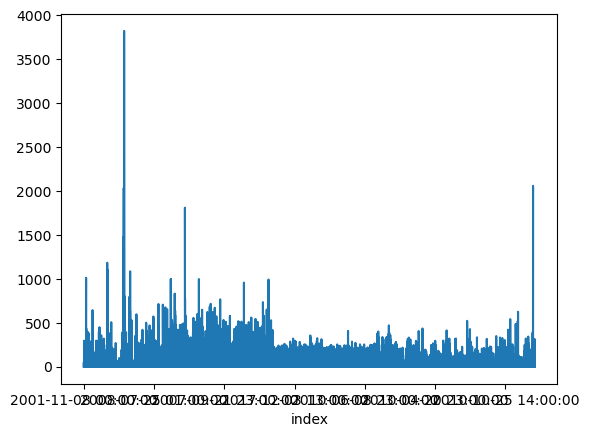

In [10]:
# Mudar medições com valores negativos para 0
df_nulos.loc[df_nulos['valor'] < 0, 'valor'] = 0
# Conferir o resultado
df_nulos['valor'].plot(kind='line')


## Guardar o novo CSV

In [11]:
# Guardar resultado em ficheiro csv
df_nulos.to_csv('./02-dados-qualar-integrados/02_longo_com_correções.csv', index=True)

## Guardar o novo CSV com as medições de apenas as estações de AML (Área metropolitana de Lisboa - sul e norte)

Pode usar este subconjunto dos dados nas fases seguintes, caso o conjunto completo se prove grande demais

In [12]:
# Usando os dados das estações (estações.xlsx), filtrar as medições das estações de AML
df_estacoes=pd.read_excel('./02-dados-qualar-integrados/estacoes.xlsx')
df_estacoes_AML_bool=df_estacoes['Região'].str.contains('AML') #escolher só as estações da região de Lisboa 
df_estacoes_AML=df_estacoes[df_estacoes_AML_bool] #escolher dataframe so com as linhas selecionadas

lista_estacoes_AML=df_estacoes_AML['Estação'] #lista das mestrados
bool=df_nulos['estacao'].isin(lista_estacoes_AML) #lista de booleanos 
df_dados_estacoes_AML = df_nulos[bool] 
    
# Conferir o resultado
df_dados_estacoes_AML

,estacao,poluente,valor
index,,,
2001-01-01 00:00:00,Alfragide/Amadora,SO2,2.9
2001-01-01 01:00:00,Alfragide/Amadora,SO2,2.9
2001-01-01 02:00:00,Alfragide/Amadora,SO2,5.6
2001-01-01 03:00:00,Alfragide/Amadora,SO2,5.6
2001-01-01 04:00:00,Alfragide/Amadora,SO2,5.6
...,...,...,...
2022-12-31 19:00:00,Paio Pires,PM2.5,8.8
2022-12-31 20:00:00,Paio Pires,PM2.5,10.5
2022-12-31 21:00:00,Paio Pires,PM2.5,9.1


In [13]:
# Guardar resultado em ficheiro csv
df_dados_estacoes_AML.to_csv('./03-dados-qualar-longo-corrigido/03-medicoes-longo-AML.csv', index=True)